In [ ]:
# Callin Switzer
# 16 July 2019
# Analyze data from photogate

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import serial
import re
import csv
import seaborn as sns
import warnings
import sys
import os
from datetime import datetime
#import msvcrt
#import winsound

In [9]:
%matplotlib inline
print(sys.version)
print(sys.executable)

# define directories
baseDir = os.getcwd()

# may want to make this directory somewhere else, if dropbox becomes a problem
dataDir = "/Users/jpuzey/Desktop/testdata/"
if not os.path.isdir(dataDir):
    os.mkdir(dataDir)

figDir = "/Users/jpuzey/Desktop/testdata/figs/"
if not os.path.isdir(figDir):
    os.mkdir(figDir)

3.7.1 (v3.7.1:260ec2c36a, Oct 20 2018, 03:13:28) 
[Clang 6.0 (clang-600.0.57)]
/Library/Frameworks/Python.framework/Versions/3.7/bin/python3


In [10]:
# read in data
dfile = os.path.join(dataDir,"2019_09_05__10_45_28_949593.csv")
df1 = pd.read_csv(dfile)
df1.tail()

,A0,A1,A2,A3,A4,A5,datetime
3569,101,105,112,115,131,123,2019-09-05 10:46:27.474807
3570,100,105,112,115,130,124,2019-09-05 10:46:27.491156
3571,100,104,112,115,131,124,2019-09-05 10:46:27.507557
3572,100,105,112,115,131,124,2019-09-05 10:46:27.523914
3573,100,105,112,114,131,124,2019-09-05 10:46:27.540287


In [11]:
df1['datetime']= pd.to_datetime(df1['datetime']

(0, 600)

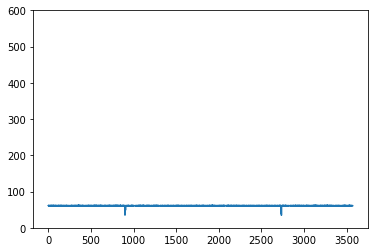

In [12]:
# plot sampling frequency
sampSec = np.diff(df1.datetime)
sampSec = sampSec / np.timedelta64(1, 's')
plt.plot(1/sampSec)
plt.ylim([0, 600])

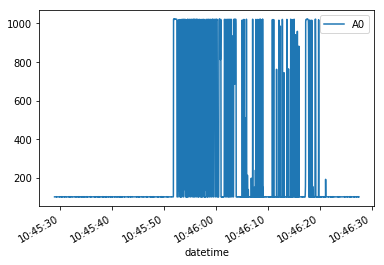

In [14]:
df1.plot(x = "datetime", y = "A0")
plt.show()

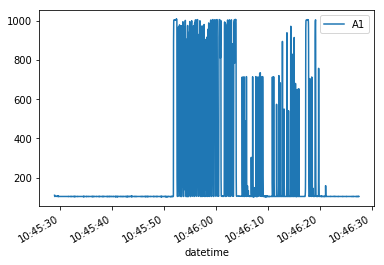

In [15]:
df1.plot(x = "datetime", y = "A1")
plt.show()

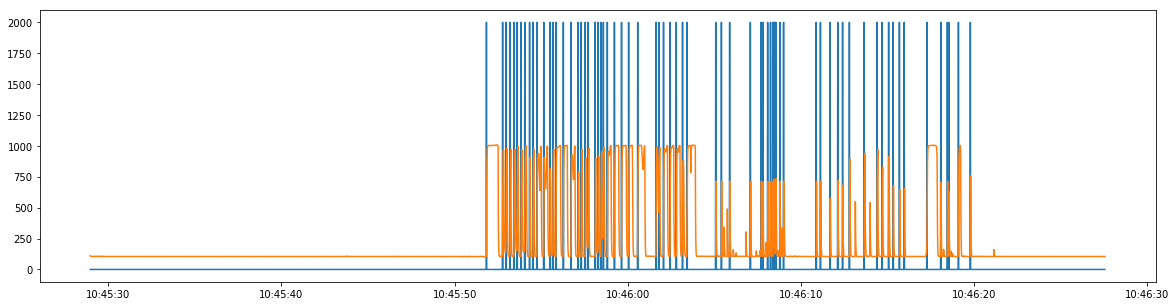

In [16]:
# calculate rising edge of data
dataMidpoint = (np.max(df1.A1) + np.min(df1.A1)) / 2
signalStarts = np.hstack([np.diff((df1.A1 > dataMidpoint)*1.0) > 0 *1.0,0])
plt.figure(figsize = [20, 5])
plt.plot(df1.datetime, signalStarts*2000)
plt.plot(df1.datetime, df1.A1)


In [17]:
# find time between peaks
timddiffs = np.diff(df1.datetime[signalStarts == 1])

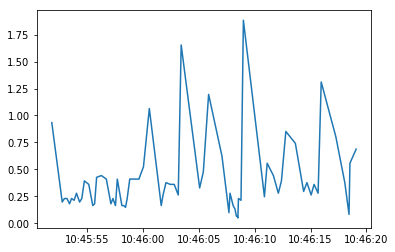

In [18]:
seconds = timddiffs / np.timedelta64(1, 's')
plt.plot((df1.datetime[signalStarts == 1][0:len(seconds)]), seconds)

In [19]:
# the whole dataset can be compressed to this: 
df1.datetime[signalStarts == 1]

1395   2019-09-05 10:45:51.837148
1452   2019-09-05 10:45:52.770918
1464   2019-09-05 10:45:52.967623
1478   2019-09-05 10:45:53.196930
1492   2019-09-05 10:45:53.426197
1503   2019-09-05 10:45:53.606438
1517   2019-09-05 10:45:53.835879
1530   2019-09-05 10:45:54.048814
1547   2019-09-05 10:45:54.327240
1559   2019-09-05 10:45:54.523814
1573   2019-09-05 10:45:54.753394
1597   2019-09-05 10:45:55.146471
1619   2019-09-05 10:45:55.506936
1629   2019-09-05 10:45:55.670684
1640   2019-09-05 10:45:55.850939
1666   2019-09-05 10:45:56.276884
1693   2019-09-05 10:45:56.719253
1718   2019-09-05 10:45:57.128872
1729   2019-09-05 10:45:57.309085
1743   2019-09-05 10:45:57.538413
1753   2019-09-05 10:45:57.702274
1778   2019-09-05 10:45:58.111784
1788   2019-09-05 10:45:58.275606
1798   2019-09-05 10:45:58.439528
1807   2019-09-05 10:45:58.586801
1821   2019-09-05 10:45:58.816246
1846   2019-09-05 10:45:59.225882
1871   2019-09-05 10:45:59.635613
1896   2019-09-05 10:46:00.045183
1928   2019-09